In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [3]:
# load dataset
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [4]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2000 non-null   int64  
 1   Surname             2000 non-null   object 
 2   CreditScore         2000 non-null   int64  
 3   Geography           2000 non-null   object 
 4   Gender              2000 non-null   object 
 5   Age                 2000 non-null   int64  
 6   Tenure              2000 non-null   int64  
 7   Balance             2000 non-null   float64
 8   NumOfProducts       2000 non-null   int64  
 9   HasCrCard           2000 non-null   object 
 10  IsActiveMember      2000 non-null   object 
 11  EstimatedSalary     2000 non-null   float64
 12  Complain            2000 non-null   object 
 13  Satisfaction Score  2000 non-null   int64  
 14  Card Type           2000 non-null   object 
 15  Point Earned        2000 non-null   int64  
dtypes: flo

In [7]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns

<h2>columns numerical and categorical</h2>

In [8]:
print('Numerical columns: ', numerical_cols)
print('Categorical columns: ', categorical_cols)

Numerical columns:  ['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']
Categorical columns:  ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


<h2>visualize numerical and categorical data</h2>

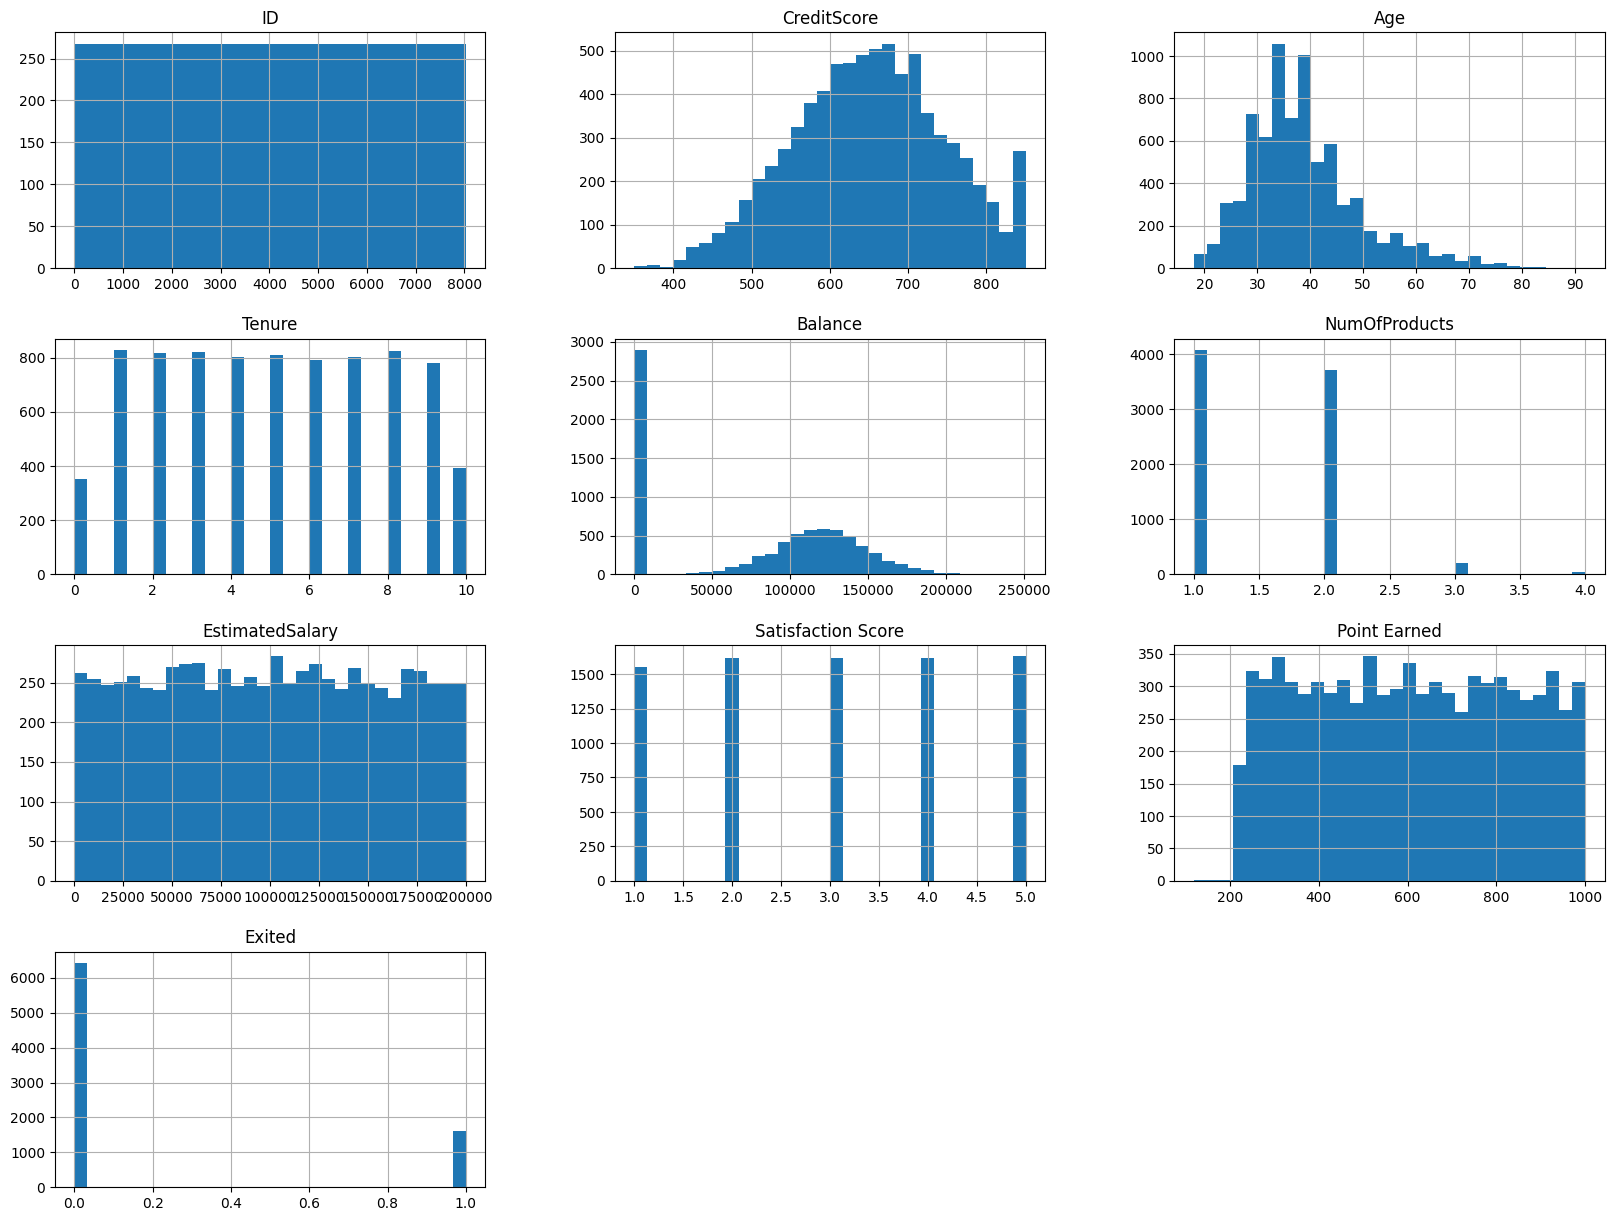

In [9]:
train[numerical_cols].hist(bins=30, figsize=(20,15))
plt.show()

In [10]:
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

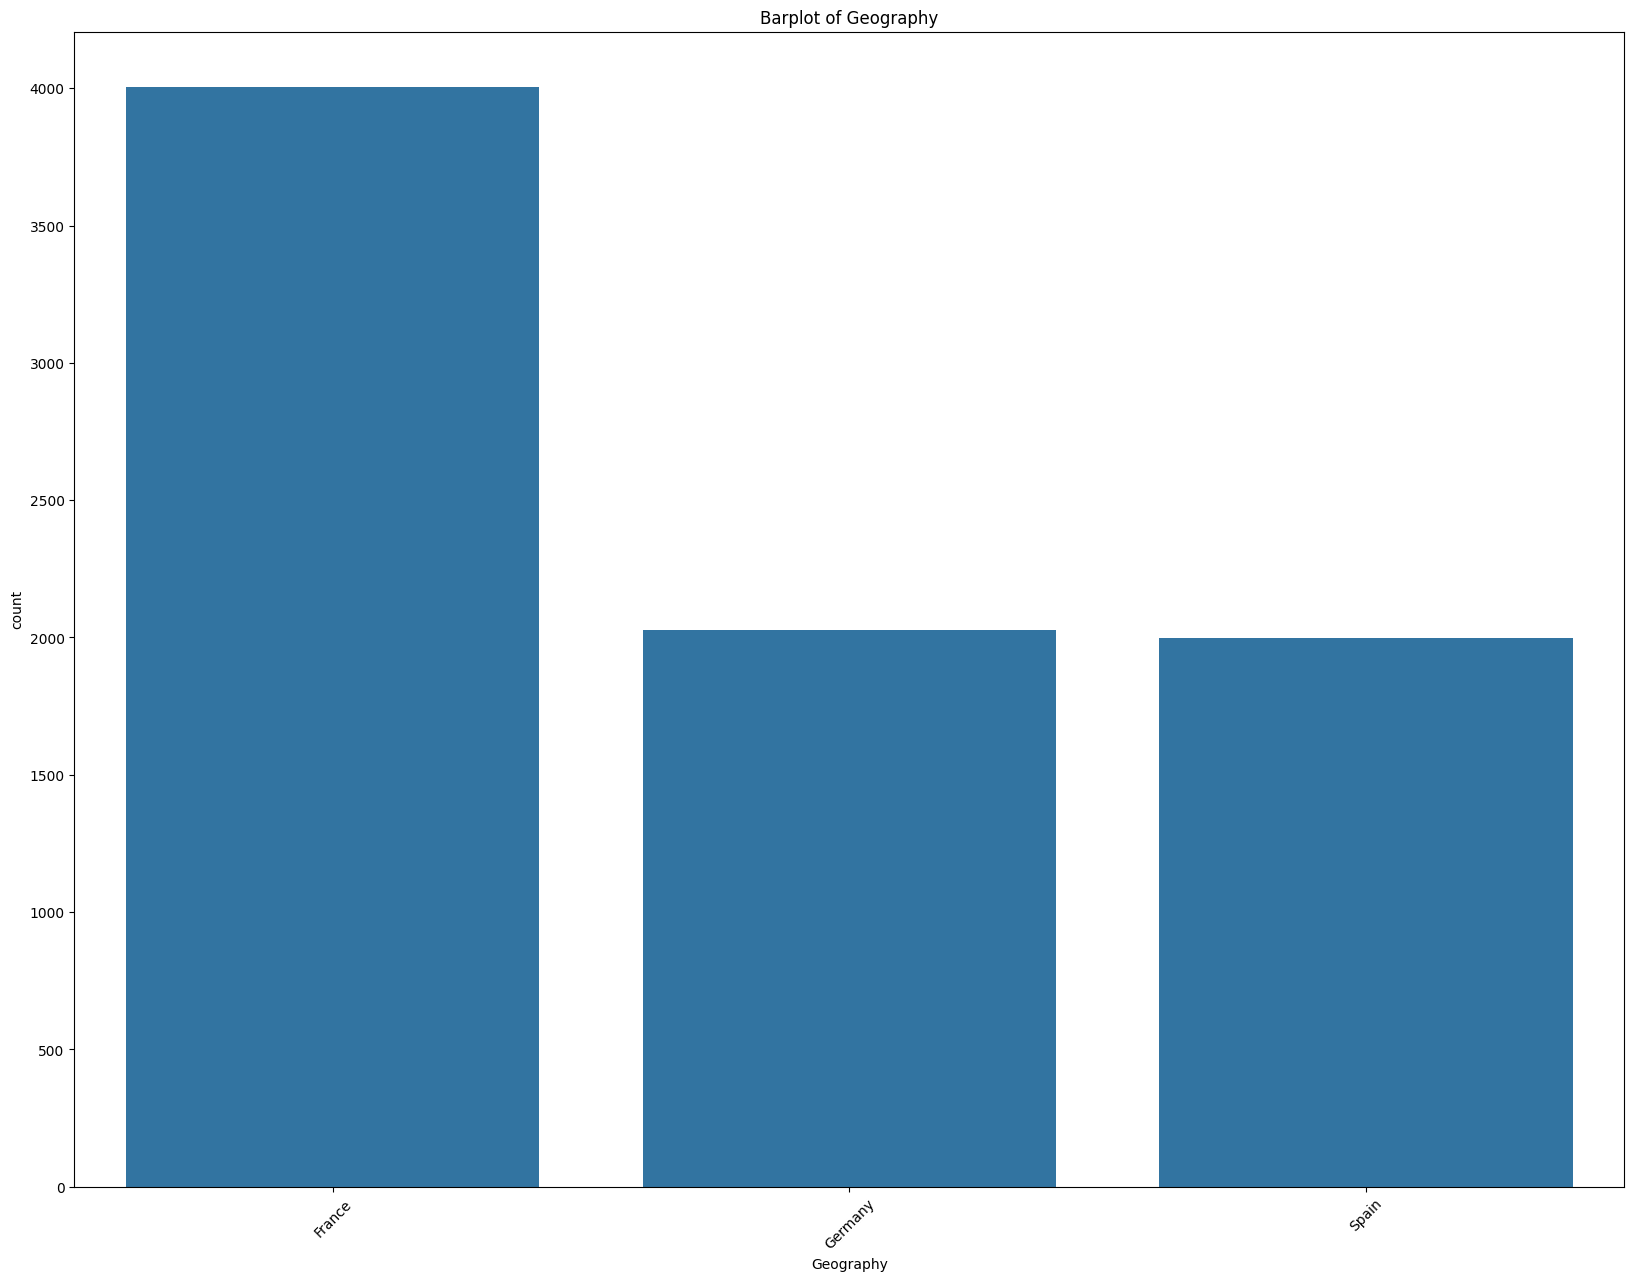

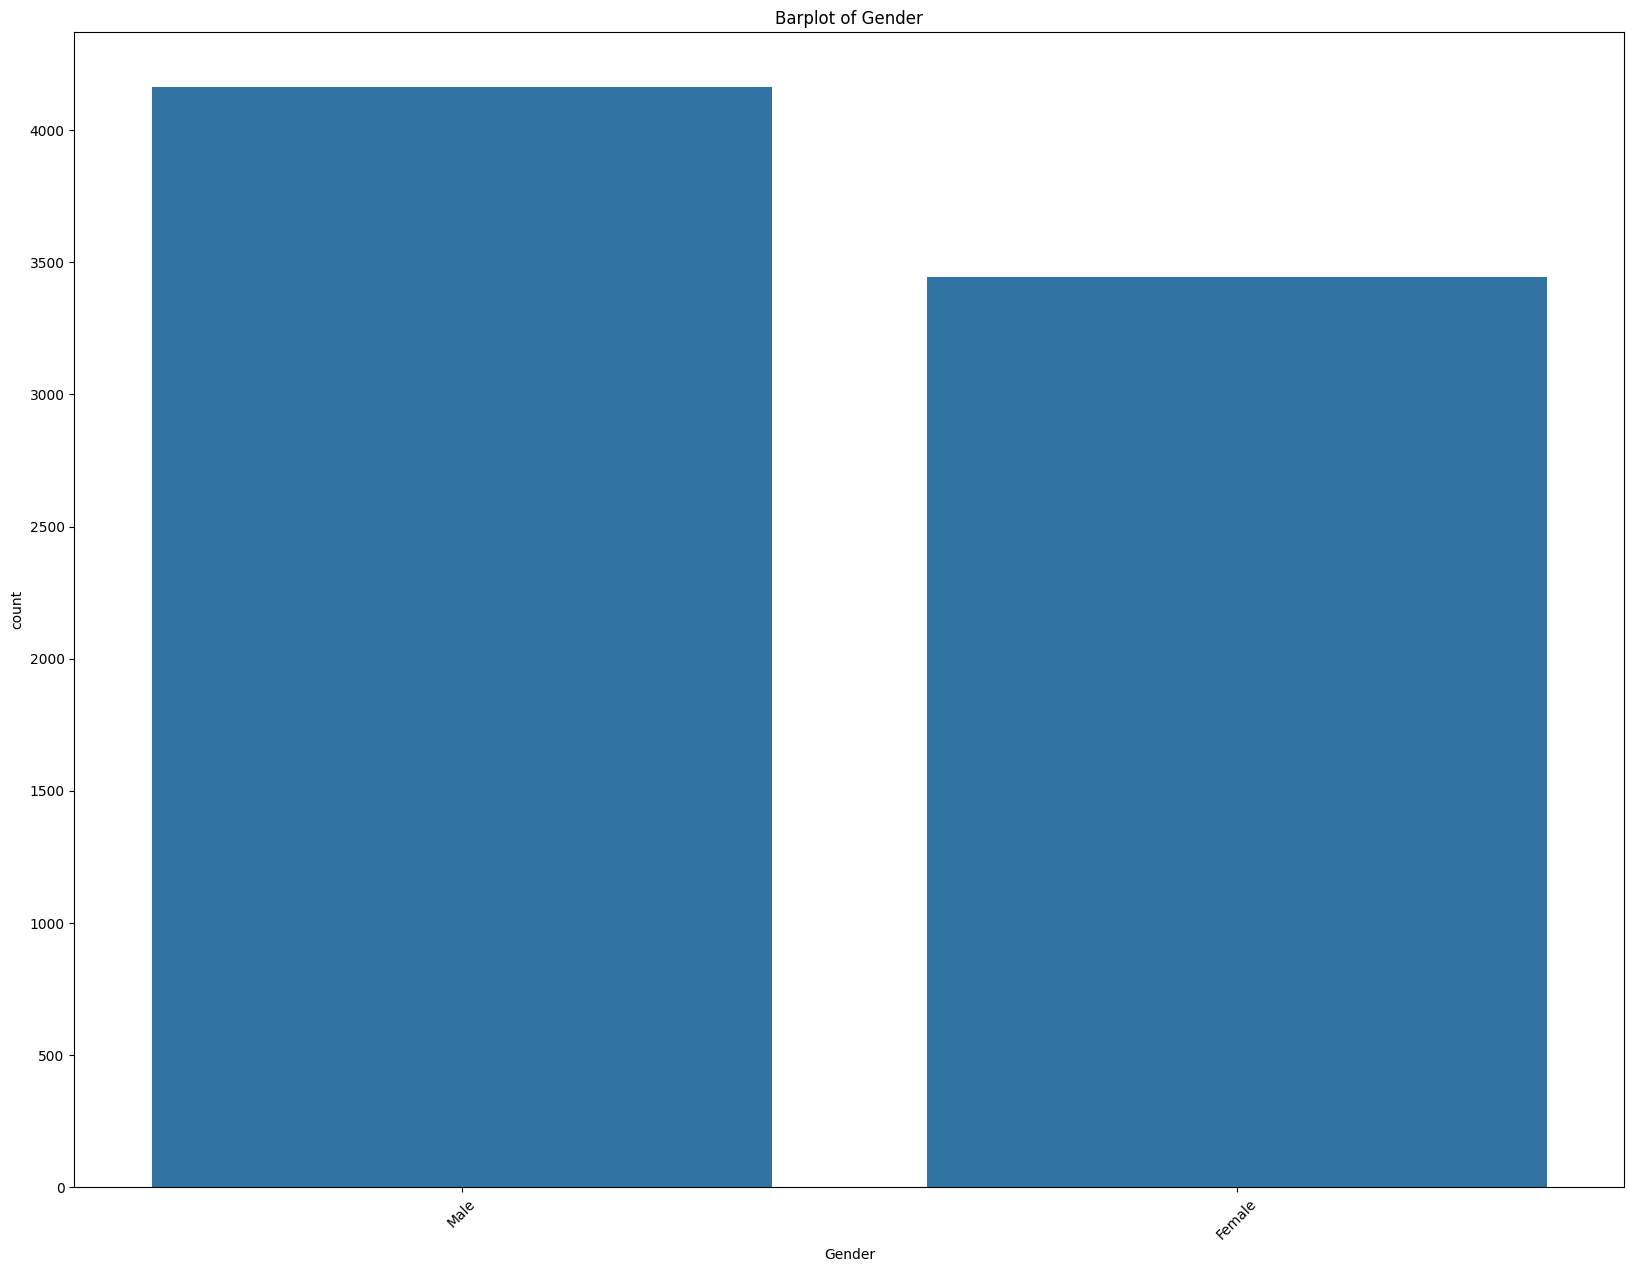

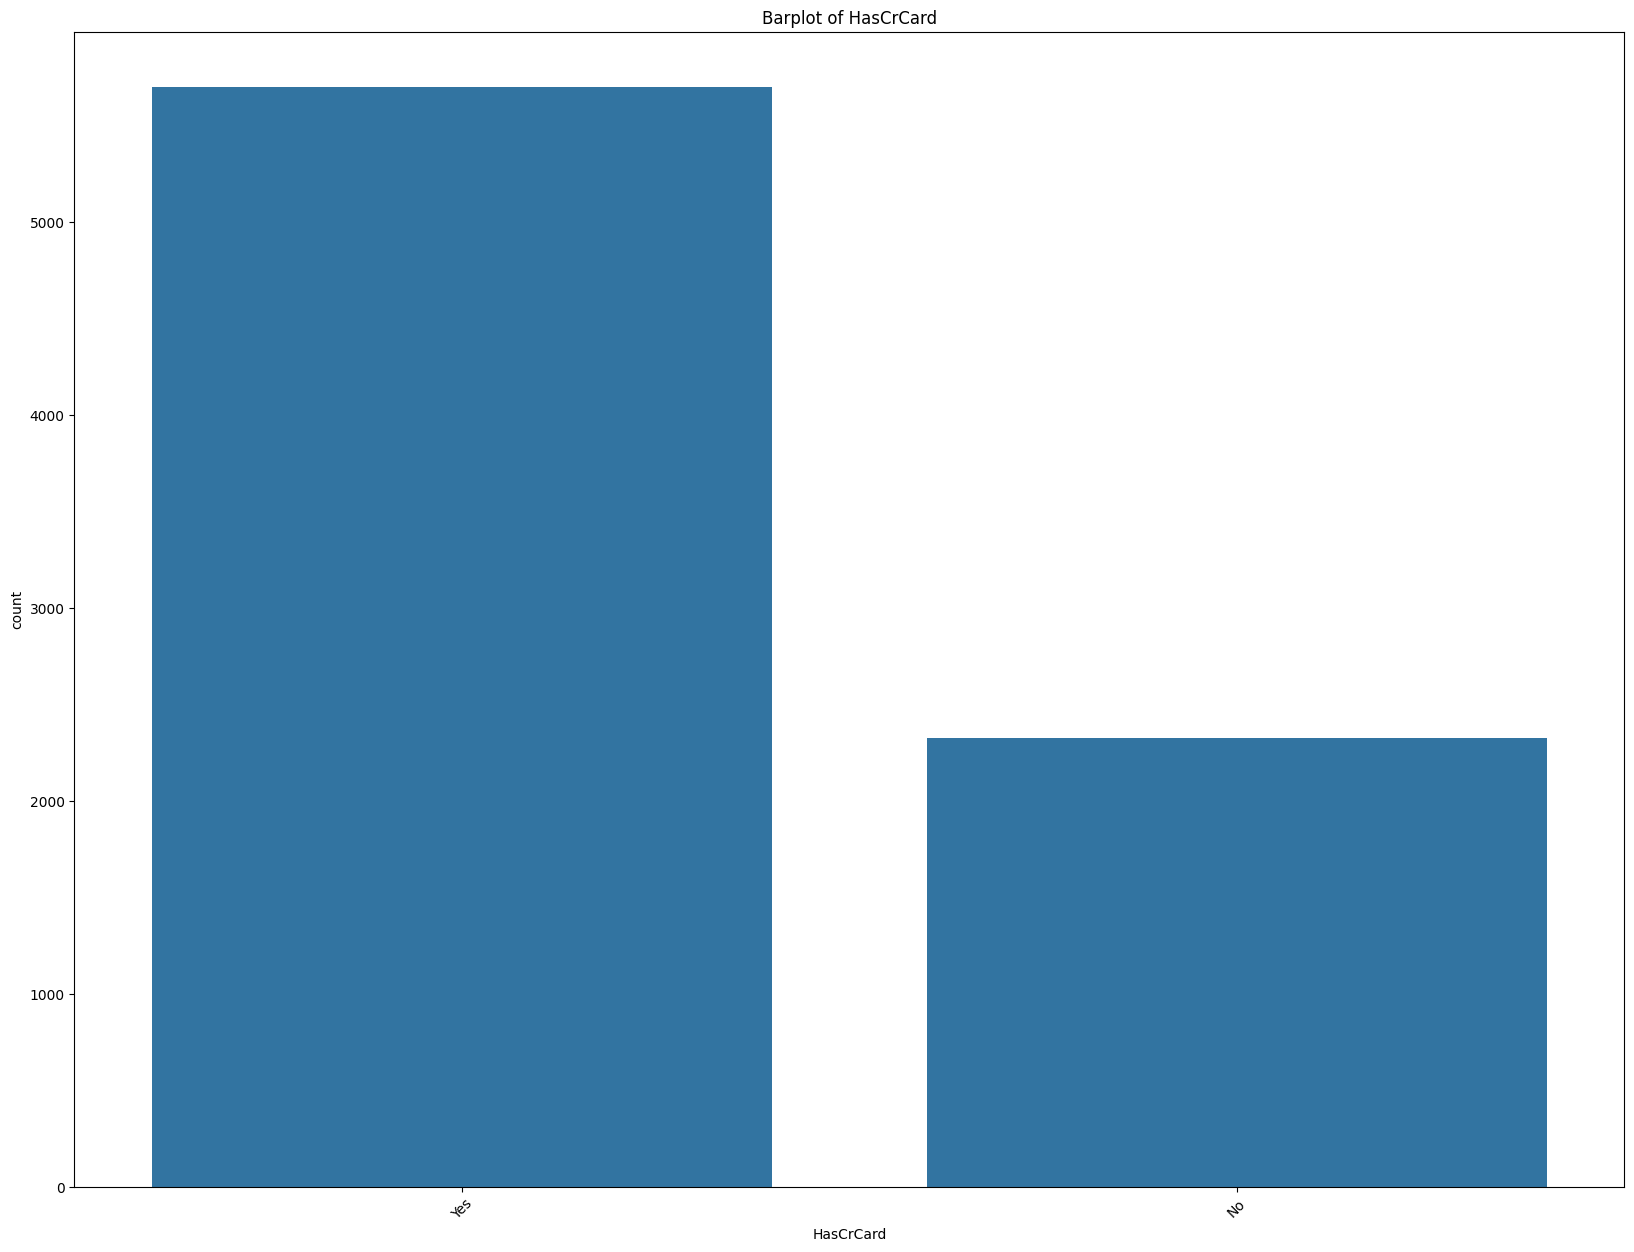

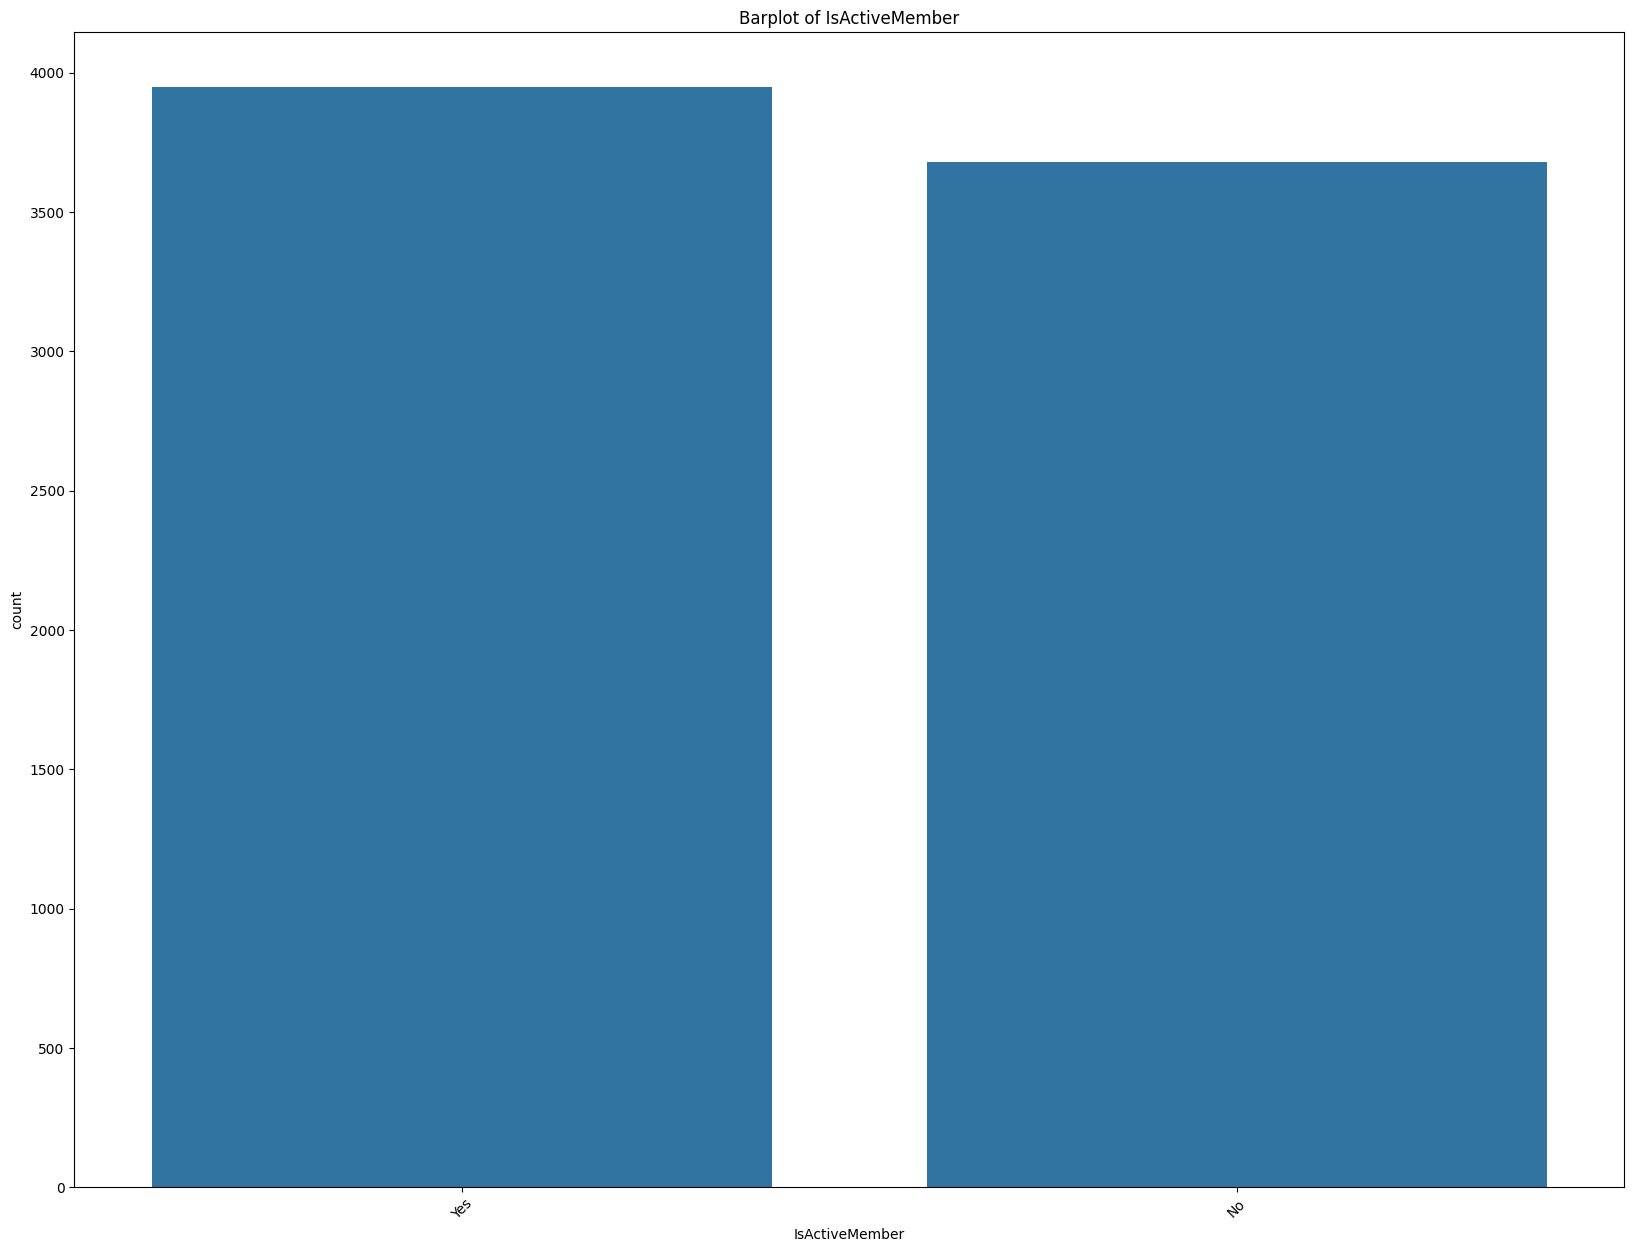

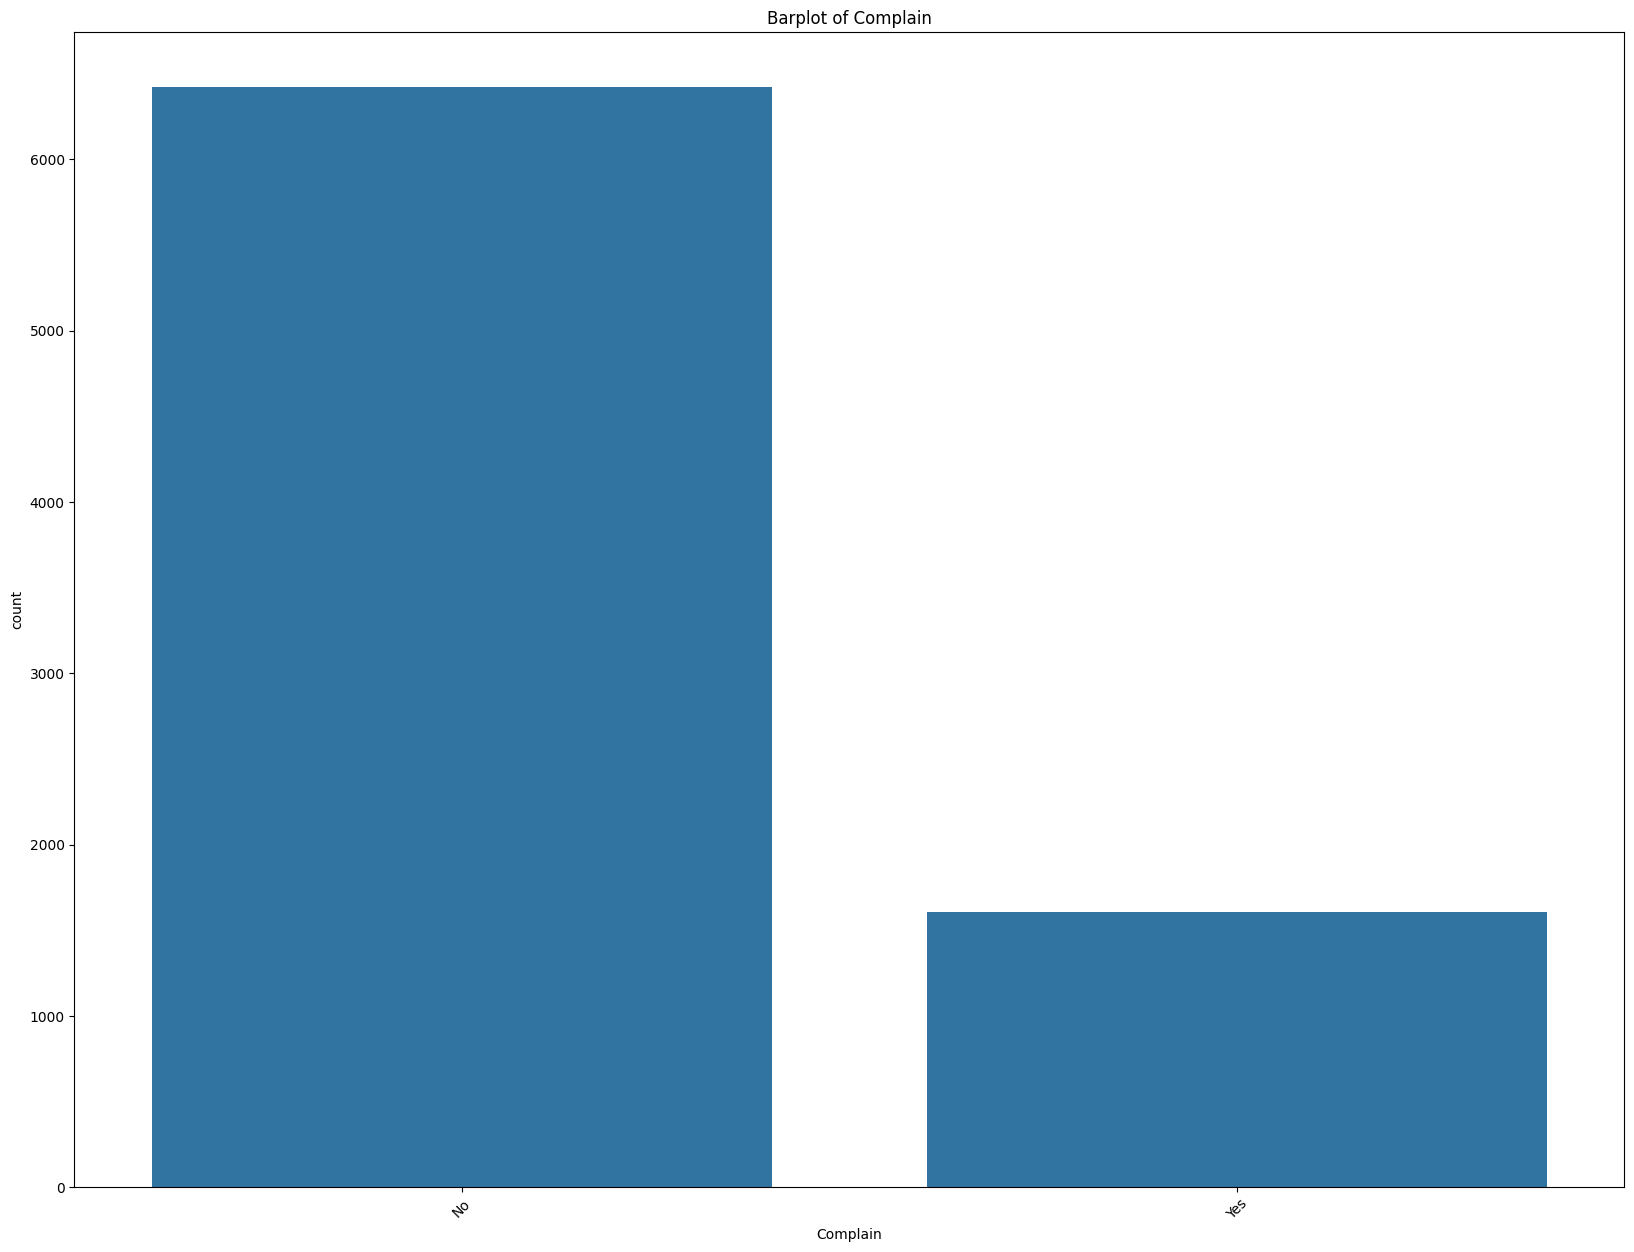

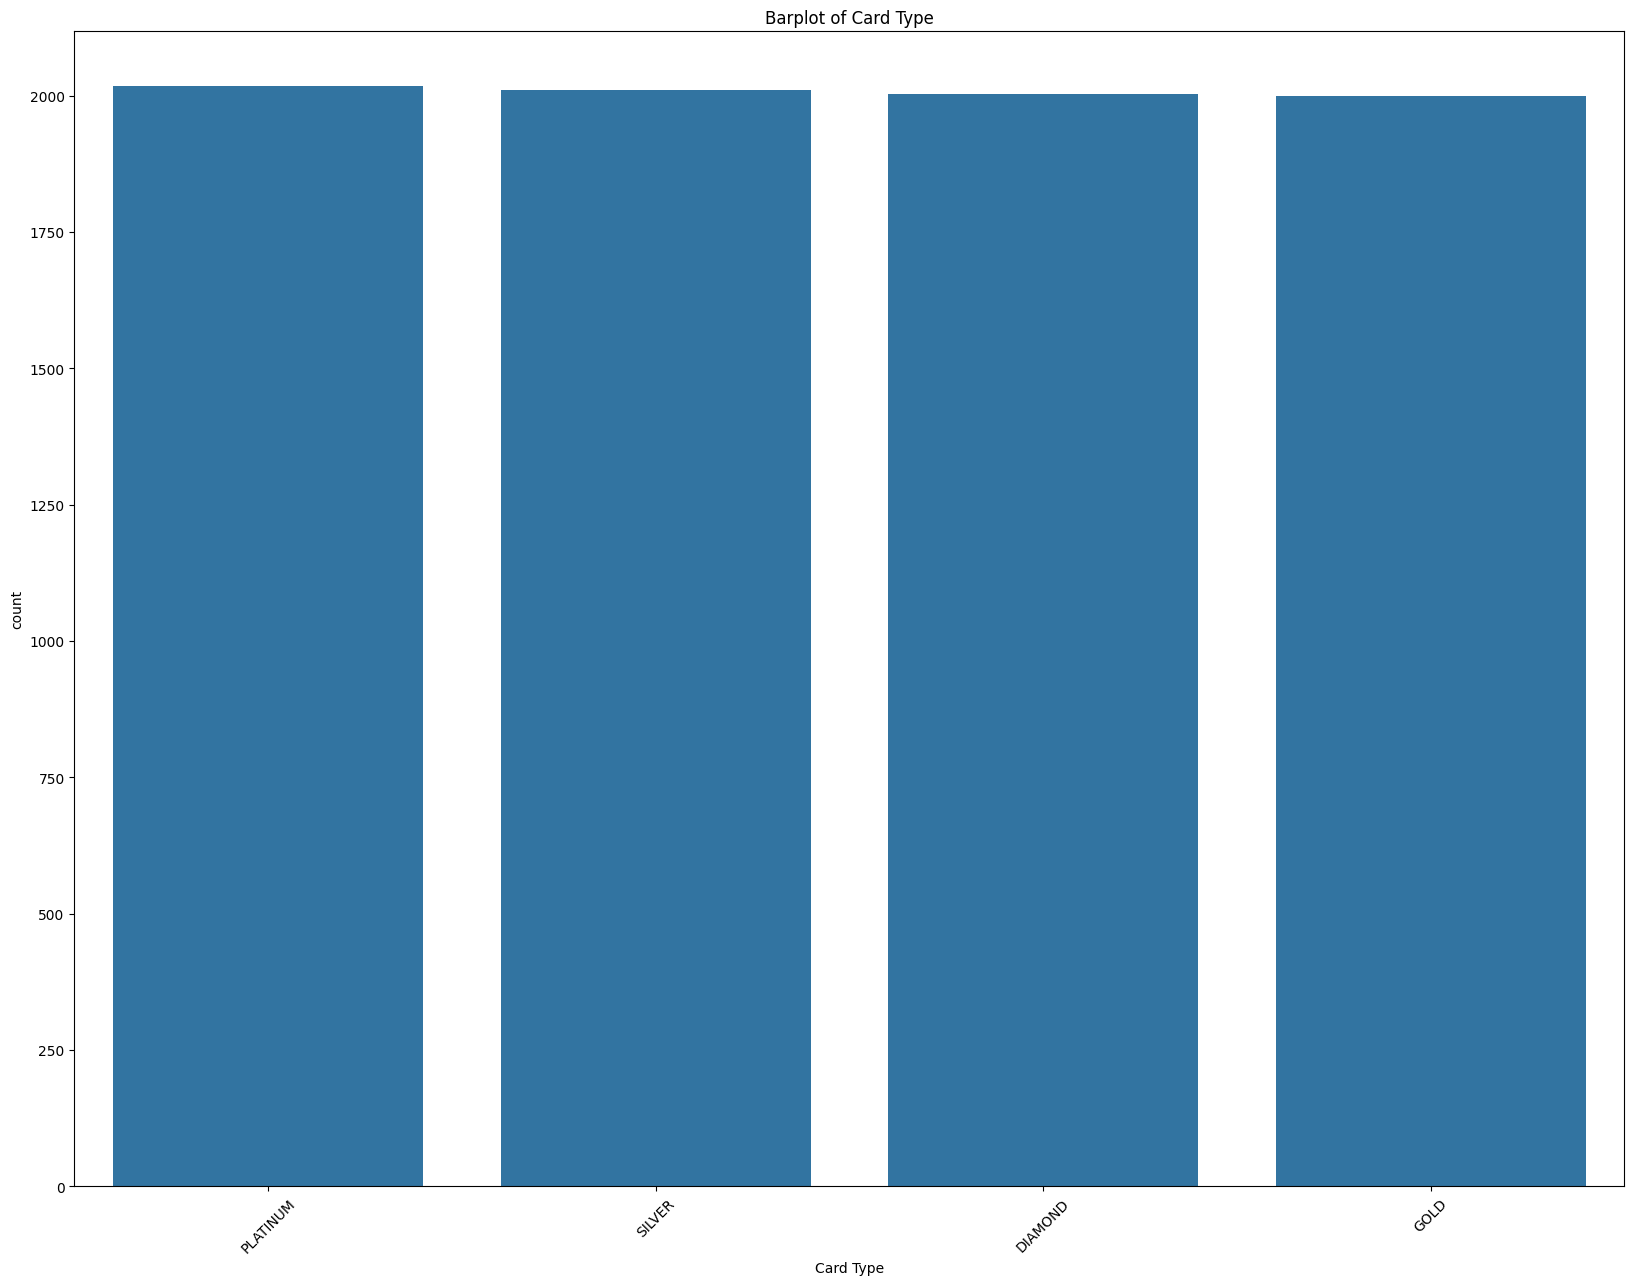

In [11]:
for col in categorical_cols:
  plt.figure(figsize=(20,15))
  sns.countplot(data=train, x=col, order=train[col].value_counts().index)
  plt.title(f'Barplot of {col}')
  plt.xticks(rotation=45)
  plt.show()

In [12]:
train2 = train.copy() # copy the original dataframe
test2 = test.copy() # copy the original dataframe

<h2>Label Encoder to change categorical cols into numerical cols

In [13]:
for col in categorical_cols:
    le = LabelEncoder()

    train2[col] = le.fit_transform(train2[col])
    test2[col] = le.transform(test2[col])
train2.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


<h2>Heatmap Correlation

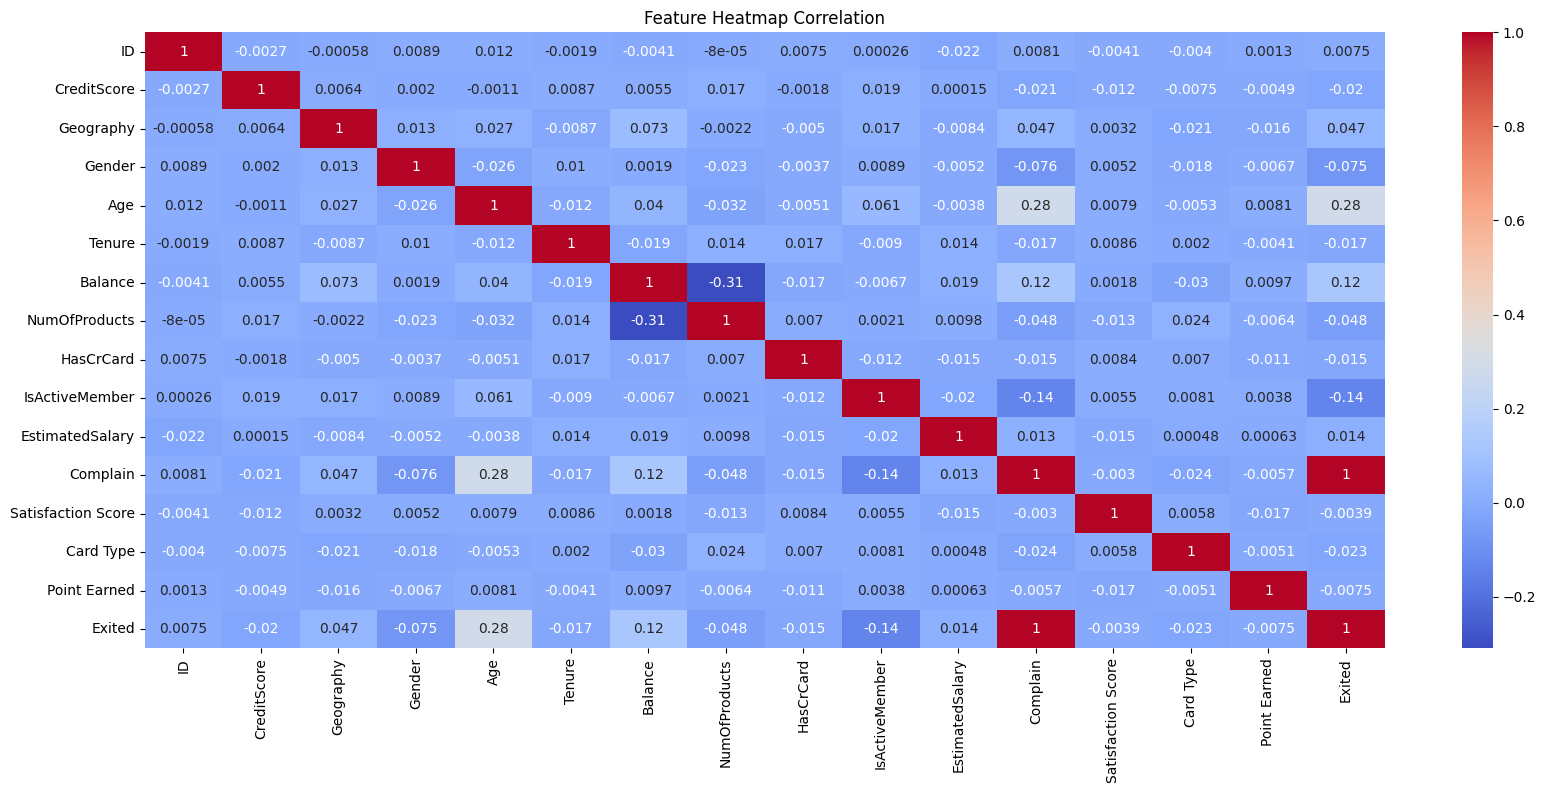

In [14]:
num_corr = train2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()


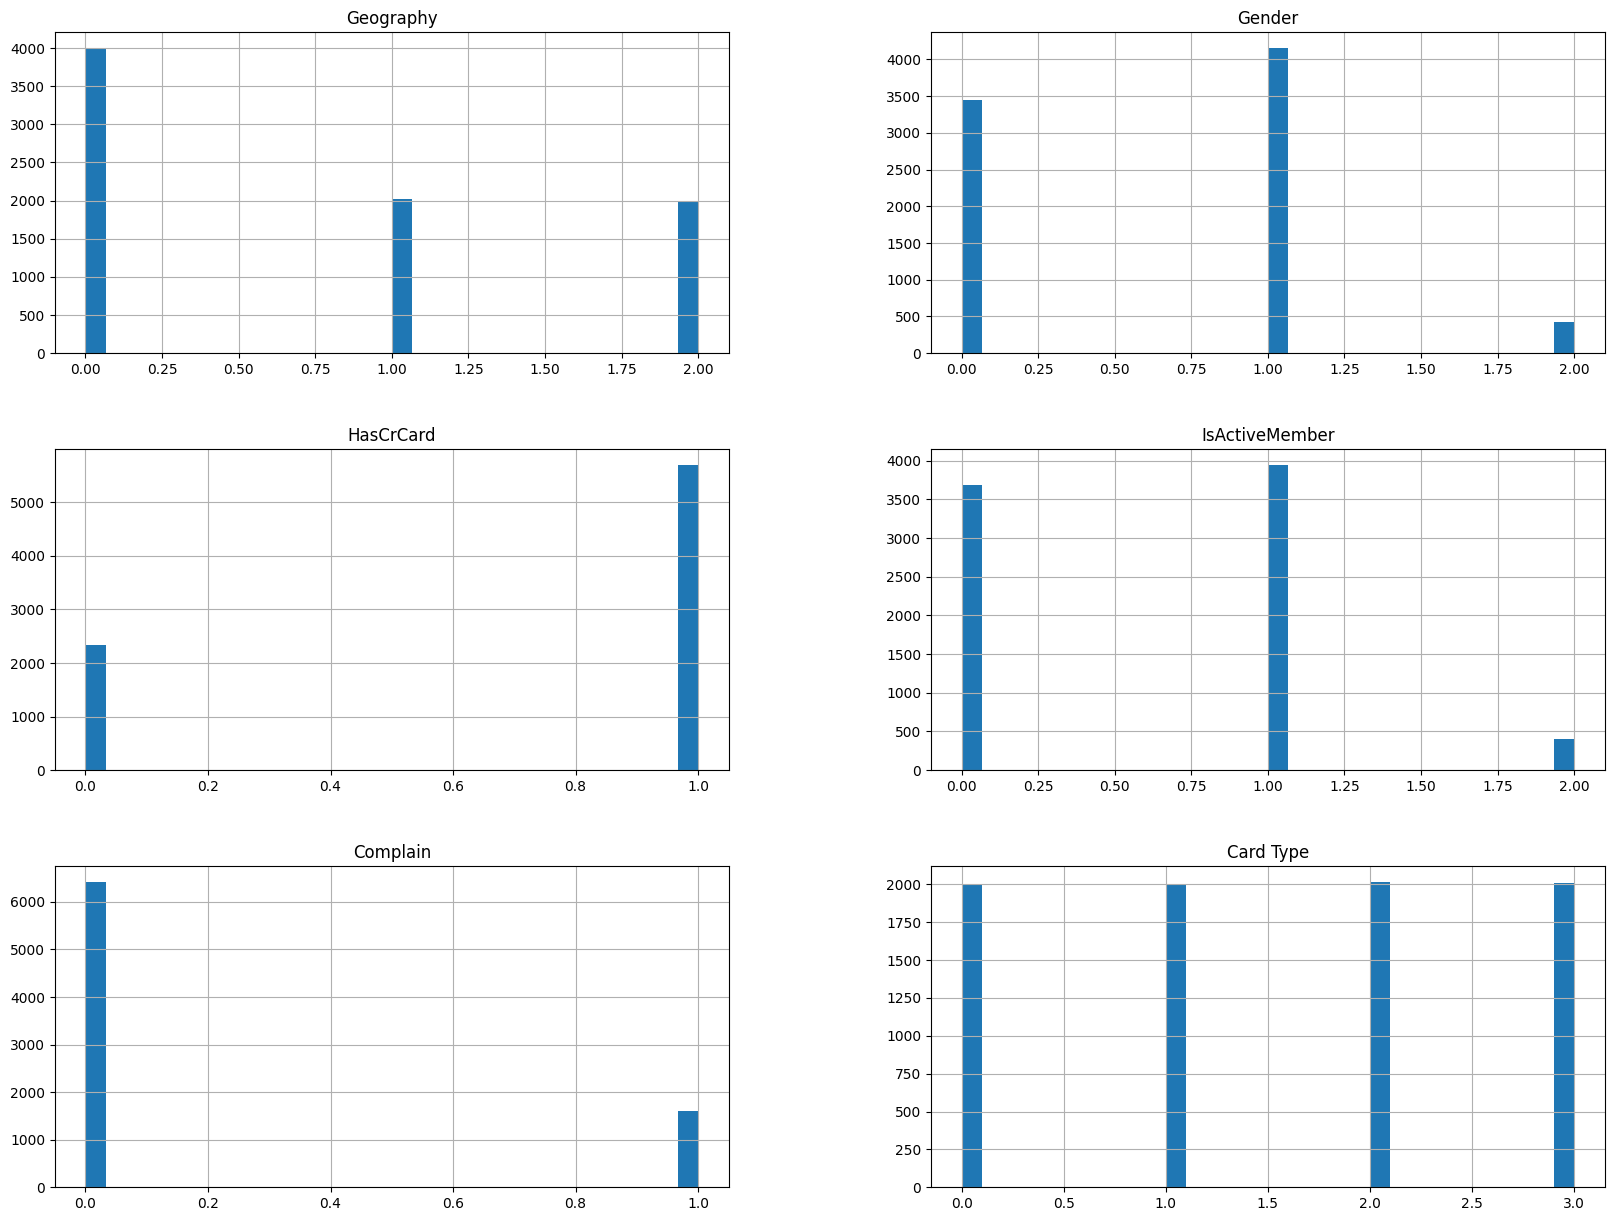

In [15]:
train2[categorical_cols].hist(bins=30, figsize=(20,15))
plt.show()

<h1>Data Preprocessing</h>

In [16]:
train.isna().sum()

,0
ID,0
Surname,0
CreditScore,427
Geography,0
Gender,423
Age,442
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [17]:
test.isna().sum()

,0
ID,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

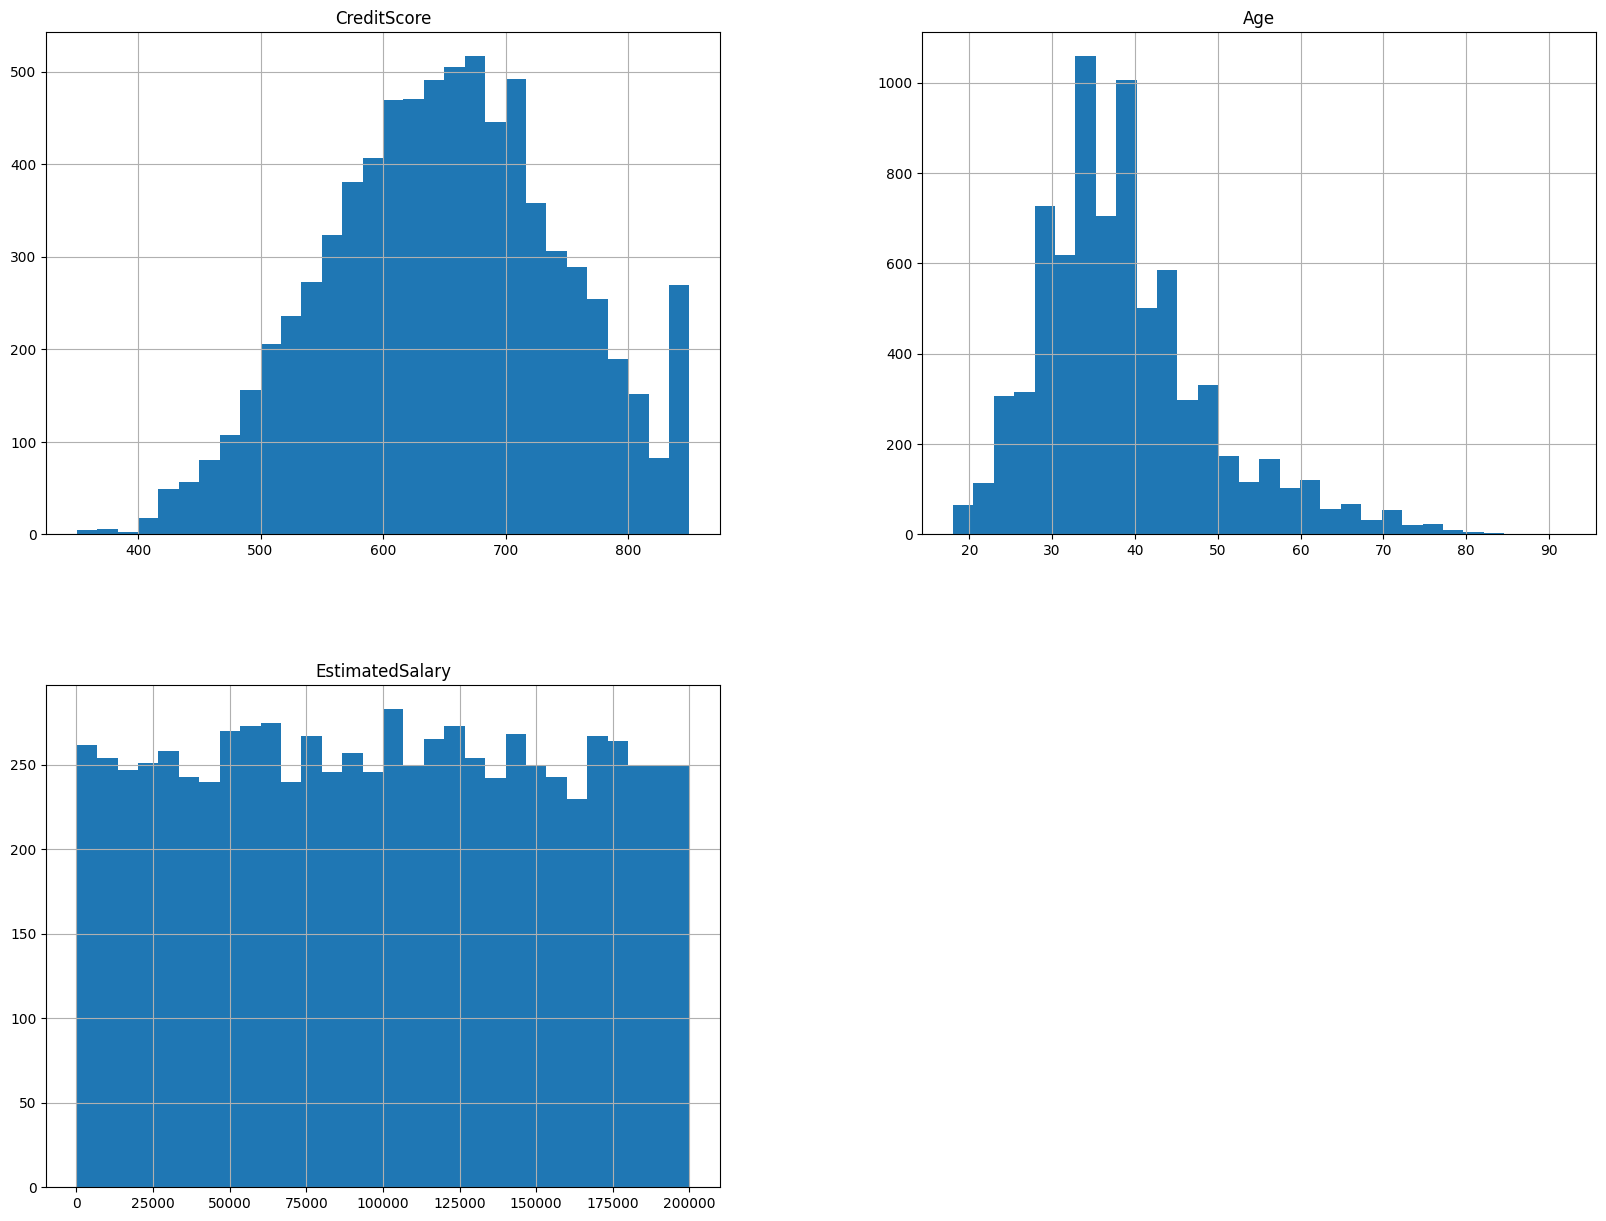

In [19]:
train[['CreditScore', 'Age', 'EstimatedSalary']].hist(bins=30, figsize=(20,15))
plt.show()

In [20]:
train['CreditScore'].fillna(train['CreditScore'].mean(), inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['EstimatedSalary'].fillna(train['EstimatedSalary'].mean(), inplace=True)

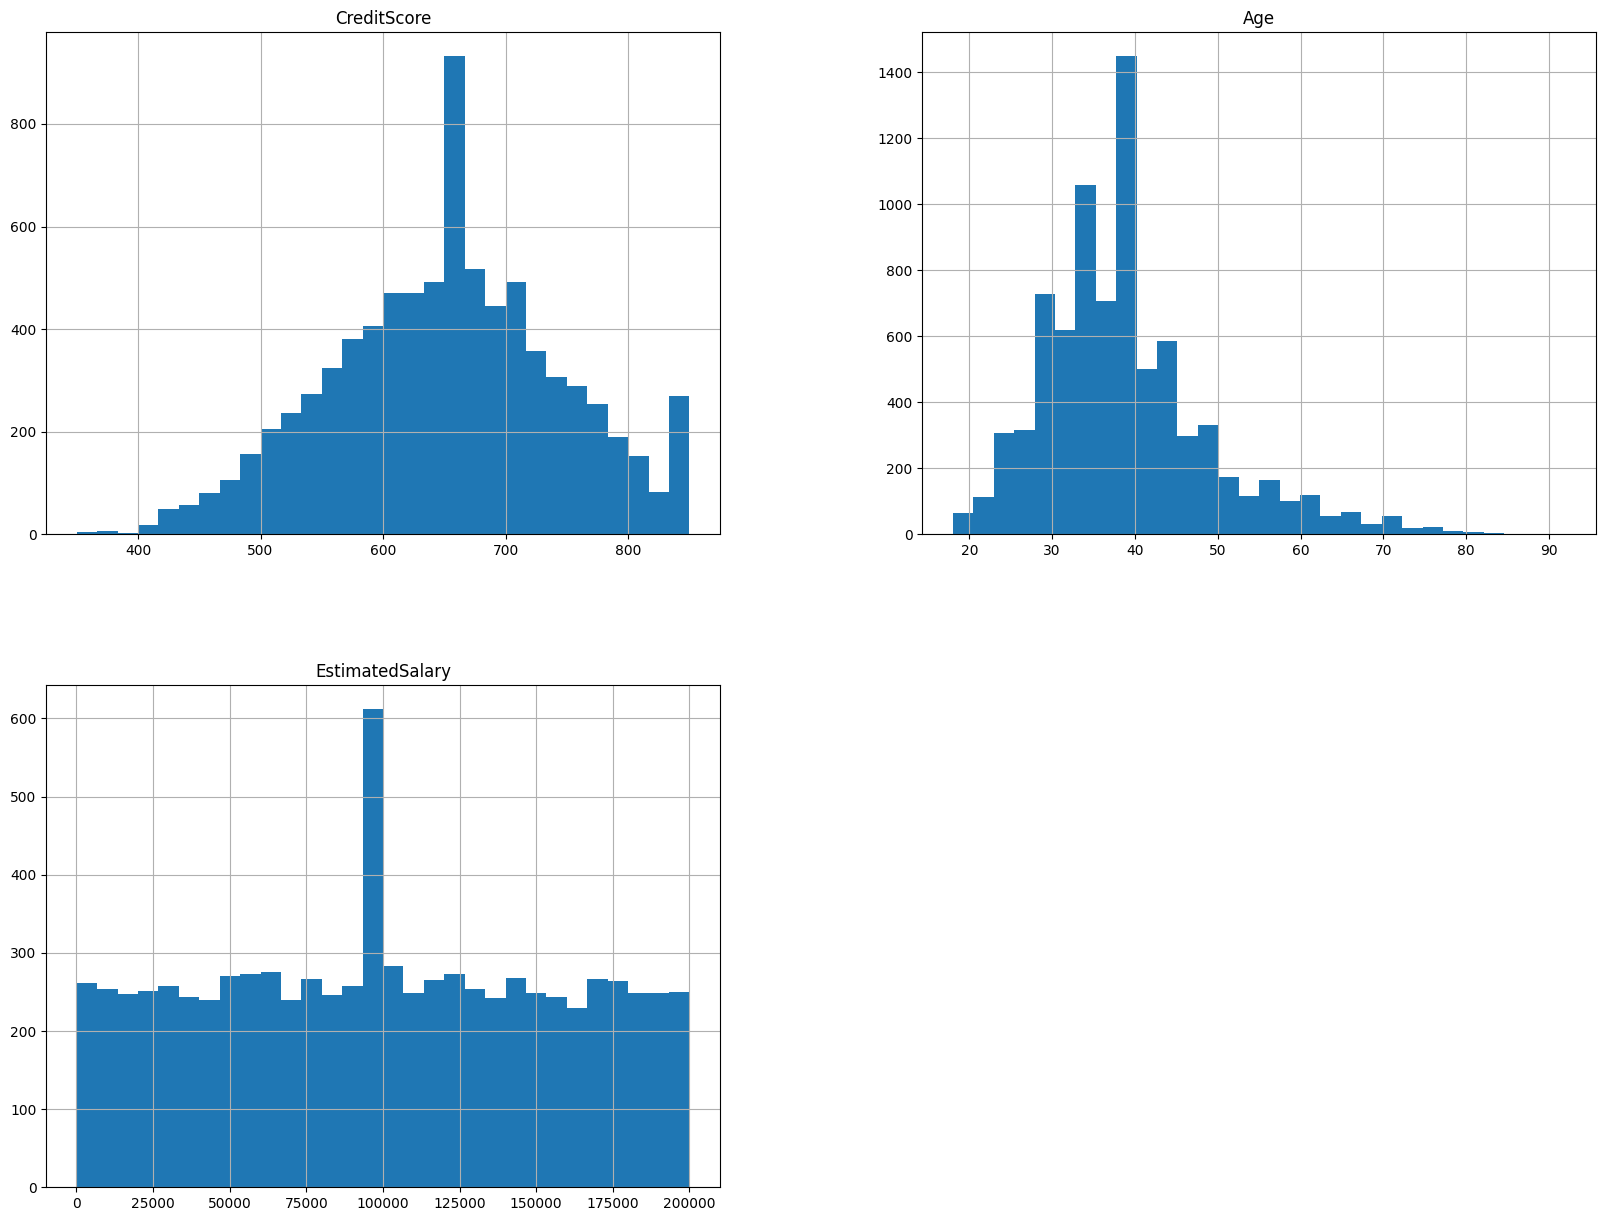

In [21]:
train[['CreditScore', 'Age', 'EstimatedSalary']].hist(bins=30, figsize=(20,15))
plt.show()

In [22]:
train.duplicated().sum()

0

In [23]:
test.duplicated().sum()

0

In [24]:
train.isna().sum()

,0
ID,0
Surname,0
CreditScore,0
Geography,0
Gender,423
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [25]:
train['Gender'].fillna(train[col].mode()[0], inplace=True)
train['IsActiveMember'].fillna(train[col].mode()[0], inplace=True)


In [26]:
train.isna().sum()

,0
ID,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [27]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male        4162
Female      3445
PLATINUM     423
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes         3948
No          3680
PLATINUM     402
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [28]:
for col in categorical_cols:
    le = LabelEncoder()

    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,2,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,1,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,2,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,2,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,2,159823.16,0,3,2,654,0


In [29]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,1,1,44,5,124601.58,2,1,2,46998.13,1,2,3,408
1,2002,Nebeolisa,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,Tsai,689,2,1,73,1,108555.07,1,0,2,167969.15,0,1,2,623
3,2004,Downie,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,Morehead,503,0,1,38,1,0.00,2,1,2,95153.24,0,2,0,433


<h1>Modelling Machine Learning

In [30]:
train.drop(['ID', 'Surname'], axis=1, inplace=True)

X = train.drop('Exited',axis=1) # features
y = train['Exited'] # target

X_train, X_val, y_train, y_val = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # test size for validation data 20%, 80% for train data
    random_state=42 # so that the result is fixed, because splitting data is actually random. you must use random_state!
)


X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6424, 14), (6424,), (1606, 14), (1606,))

<h2>Using CatBoost

In [31]:
y_val

,Exited
6074,0
5958,1
3032,0
6446,0
318,0
...,...
4609,0
2943,0
2441,0
921,1


In [32]:
model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=5, loss_function='Logloss', eval_metric='Accuracy')

model.fit(X_train, y_train,  # If you have categorical features
          eval_set=(X_val, y_val),  # For early stopping and monitoring
          # ... other fit parameters
          )

predictions = model.predict(X_val)

0:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 56.1ms	remaining: 2.75s
1:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 65.9ms	remaining: 1.58s
2:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 68.5ms	remaining: 1.07s
3:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 78.2ms	remaining: 900ms
4:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 89.3ms	remaining: 803ms
5:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 94.1ms	remaining: 690ms
6:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 97.8ms	remaining: 601ms
7:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 105ms	remaining: 550ms
8:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 113ms	remaining: 514ms
9:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 115ms	remaining: 462ms
10:	learn: 0.9987547	test: 0.9987547	best: 0.9987547 (0)	total: 118ms	remaining: 417ms
11:	learn: 0.9987547	test: 0.9987547	best: 0.9

In [33]:
y_pred = model.predict(X_val)
pd.Series(y_pred).value_counts()

,count
0,1296
1,310


<h2>

<h1> F1-Score

In [34]:
f1 = f1_score(y_pred, y_val)
print('F1 Score:', f1)

F1 Score: 0.9967637540453075


<h1>Predict On Test Data

In [35]:
test.drop(['ID', 'Surname'], axis=1, inplace=True)

test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,693,1,1,44,5,124601.58,2,1,2,46998.13,1,2,3,408
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,689,2,1,73,1,108555.07,1,0,2,167969.15,0,1,2,623
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,503,0,1,38,1,0.00,2,1,2,95153.24,0,2,0,433


In [36]:
test['Exited'] = model.predict(test) # predict and add 'Exited' column on test data

test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,693,1,1,44,5,124601.58,2,1,2,46998.13,1,2,3,408,1
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800,0
2,689,2,1,73,1,108555.07,1,0,2,167969.15,0,1,2,623,0
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472,0
4,503,0,1,38,1,0.00,2,1,2,95153.24,0,2,0,433,0


In [37]:
test['Exited'].value_counts()

,count
Exited,
0,1556
1,444


<h1> Submission

In [38]:
submission = pd.read_csv('sample_data/sample_submission.csv')

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      2000 non-null   int64
 1   Exited  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


In [39]:
submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,1
1998,3999,0


In [40]:
submission.head()

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0


In [41]:
submission['Exited'] = test['Exited']

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,0
1998,3999,0


In [42]:
submission.to_csv('Submission.csv', index=False, header=True,  encoding='utf-8')